In [1]:
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.modeling_utils import create_labels

In [2]:
ticker = "AAPL"
data = create_labels(ticker)
data.head()

,Close,MA_10,Volatility_10,Momentum_5,RSI_14,Target
Date,,,,,,
2018-01-23,41.501518,41.446194,0.423416,0.199261,68.998762,0
2018-01-24,40.840458,41.443616,0.427400,-1.143963,56.473649,0
2018-01-25,40.111420,41.369071,0.579170,-1.910500,44.570103,1
2018-01-26,40.205185,41.280696,0.684510,-1.629223,39.168205,0
2018-01-29,39.372997,41.066673,0.903338,-2.119144,33.192974,0


In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=["Target","Close"])
y = data["Target"]

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on test set
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5117056856187291
Confusion Matrix:
 [[61 78]
 [68 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.44      0.46       139
           1       0.54      0.57      0.56       160

    accuracy                           0.51       299
   macro avg       0.51      0.51      0.51       299
weighted avg       0.51      0.51      0.51       299



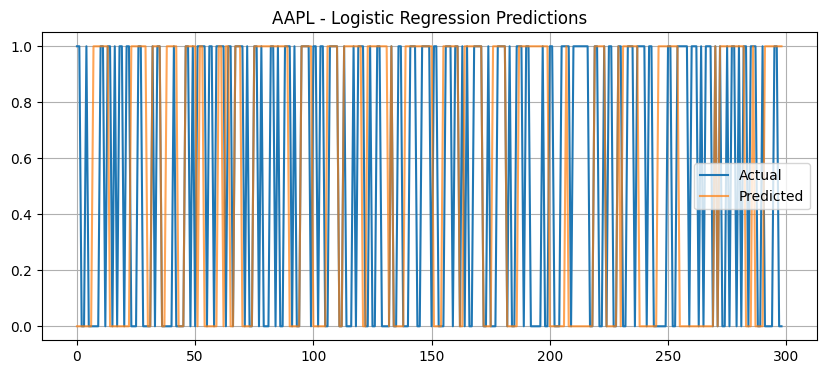

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title(f"{ticker} - Logistic Regression Predictions")
plt.legend()
plt.grid()
plt.show()

In [7]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

         Feature  Coefficient
1  Volatility_10    -0.030638
2     Momentum_5    -0.016124
3         RSI_14     0.002423
0          MA_10    -0.001219
